In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.drop('Car_Name', axis=1, inplace=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 8)

In [5]:
df.isna().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.describe(include='O')

,Fuel_Type,Seller_Type,Transmission
count,301,301,301
unique,3,2,2
top,Petrol,Dealer,Manual
freq,239,195,261


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [9]:
current_year = 2021

df['Year'] = current_year - df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,7,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,8,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,4,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,10,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,7,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,7,3.35,5.59,27000,0,0,1,0,1
1,8,4.75,9.54,43000,0,1,0,0,1
2,4,7.25,9.85,6900,0,0,1,0,1
3,10,2.85,4.15,5200,0,0,1,0,1
4,7,4.60,6.87,42450,0,1,0,0,1


In [11]:
df.shape

(301, 9)

In [12]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [13]:
df.dtypes

Year                        int64
Selling_Price             float64
Present_Price             float64
Kms_Driven                  int64
Owner                       int64
Fuel_Type_Diesel            uint8
Fuel_Type_Petrol            uint8
Seller_Type_Individual      uint8
Transmission_Manual         uint8
dtype: object

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,7.372093,2.891554,3.00,5.0,7.0,9.0,18.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0
Fuel_Type_Diesel,301.0,0.199336,0.400166,0.00,0.0,0.0,0.0,1.0
Fuel_Type_Petrol,301.0,0.794020,0.405089,0.00,1.0,1.0,1.0,1.0
Seller_Type_Individual,301.0,0.352159,0.478439,0.00,0.0,0.0,1.0,1.0
Transmission_Manual,301.0,0.867110,0.340021,0.00,1.0,1.0,1.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


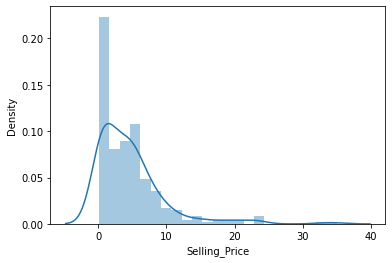

In [15]:
sns.distplot(df['Selling_Price'])
plt.show()

<Figure size 1080x720 with 0 Axes>

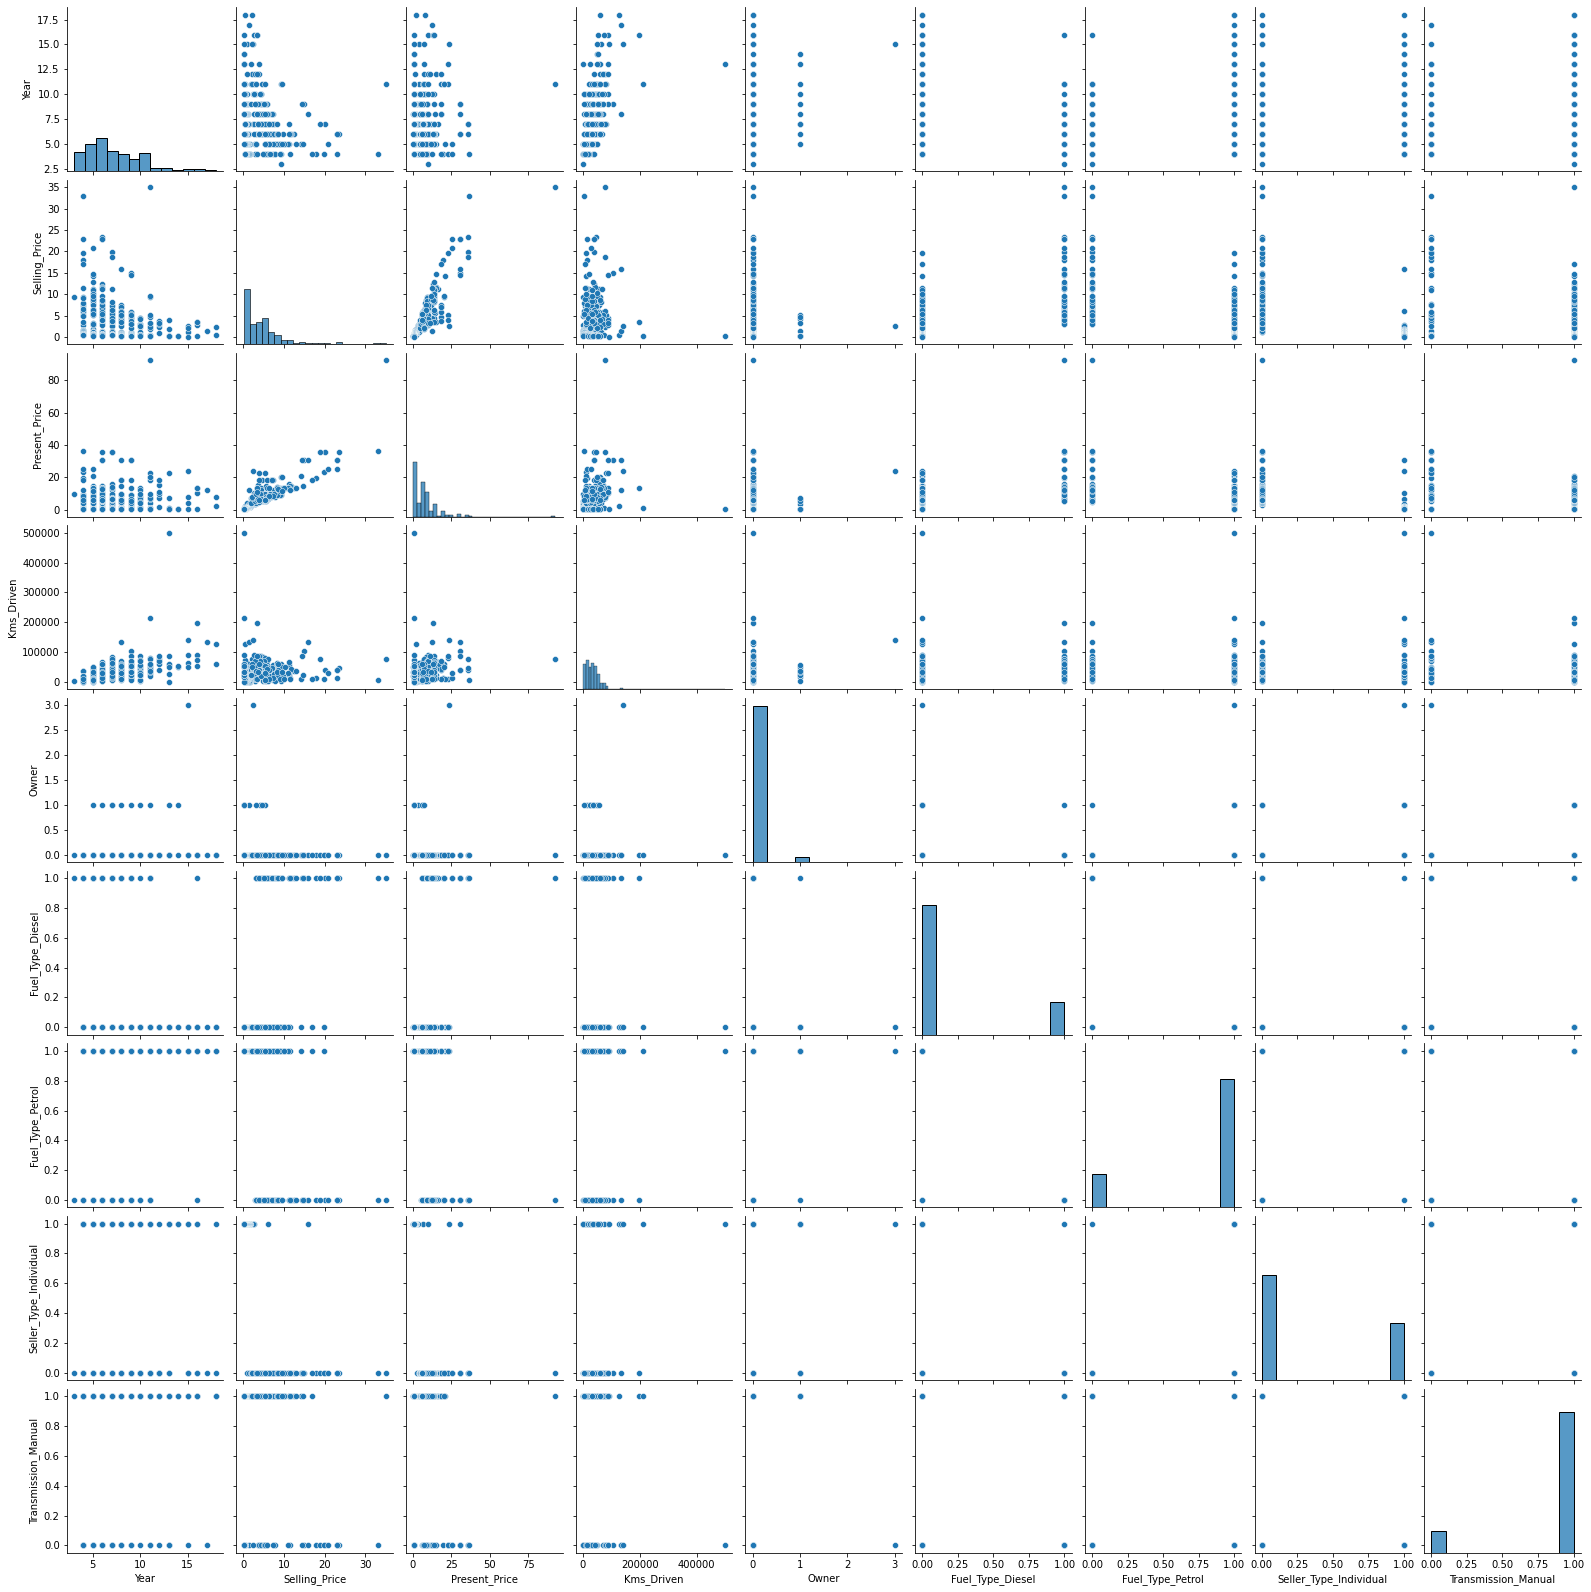

In [16]:
plt.figure(figsize=(15, 10))
sns.pairplot(df)
plt.show()

In [17]:
x = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
x[:5], y[:5]

(   Year  Present_Price  ...  Seller_Type_Individual  Transmission_Manual
 0     7           5.59  ...                       0                    1
 1     8           9.54  ...                       0                    1
 2     4           9.85  ...                       0                    1
 3    10           4.15  ...                       0                    1
 4     7           6.87  ...                       0                    1
 
 [5 rows x 8 columns], 0    3.35
 1    4.75
 2    7.25
 3    2.85
 4    4.60
 Name: Selling_Price, dtype: float64)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train.shape, x_test.shape

((225, 8), (76, 8))

In [19]:
x_train[:5]

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
129,4,0.84,5000,0,0,1,1,1
232,6,14.79,12900,0,0,1,0,0
195,6,0.32,35000,0,0,1,1,1
277,6,13.60,21780,0,0,1,0,1
280,6,5.90,14465,0,0,1,0,1


In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
from sklearn.ensemble import RandomForestRegressor
from xgboost  import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf = RandomForestRegressor()
xg = XGBRegressor()
gd = GradientBoostingRegressor()

model_list=[rf, xg, gd]

def build_model(model, xtrain, ytrain, xtest, ytest):
  Model = model.fit(xtrain, ytrain)
  return print('Accuracy : ', Model.score(x_test, y_test))
  
for i in model_list:
 build_model(i, x_train, y_train, x_test, y_test)

Accuracy :  0.9628631631406757
[11:05:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy :  0.9754620272655542
Accuracy :  0.9680491047522689


In [22]:
from sklearn.model_selection import cross_val_score

def cross_validation(estimator, xtrain, ytrain, cv, scoring):
  validate_score = cross_val_score(estimator=estimator, X=xtrain, y=ytrain, cv=cv, scoring=scoring)
  return print('Validate Score : ', validate_score.mean()*100)

for i in model_list:
  cross_validation(i, x_train, y_train, 5, 'r2')

Validate Score :  85.47481874555606
[11:05:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:05:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:05:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:05:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:05:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validate Score :  85.18540741151959
Validate Score :  86.36497265659966


In [24]:
param_grid = [{'max_depth':[2, 3, 4, 5],
               'max_leaf_nodes':[2, 3, 4, 5],
               'min_samples_leaf':[1, 2, 3, 4],
               'min_samples_split':[2, 4, 6, 8],
               'n_estimators':[100, 200, 300, 400, 500]}]       

from sklearn.model_selection import RandomizedSearchCV
Rs_cv = RandomizedSearchCV(estimator = rf, param_distributions = param_grid,scoring='r2', n_iter = 10, cv = 5, verbose=1, random_state=42, n_jobs = -1)
Rs_cv.fit(x_train, y_train)        

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [25]:
Rs_cv.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 400}

In [26]:
Rs_cv.best_score_

0.7250617252444648

In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def model_evaluate(model):
  y_pred = model.predict(x_test)
  print('r2 Score :', r2_score(y_test, y_pred))
  print('MSE :', mean_squared_error(y_test, y_pred))
  print('MAE :', mean_absolute_error(y_test, y_pred))
  print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

model_evaluate(xg)  

r2 Score : 0.9754620272655542
MSE : 0.6741637126618739
MAE : 0.5115041297203616
RMSE : 0.8210747302541188


In [41]:
import pickle

with open('car_price_prediction_model.pkl', 'wb') as f:
  pickle.dump(xg, f)

In [42]:
with open('/content/car_price_prediction_model.pkl', 'rb') as f:
  model = pickle.load(f)

[11:17:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [47]:
model.score(x_test, y_test)

0.9754620272655542